In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train  = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [5]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [6]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [7]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [8]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

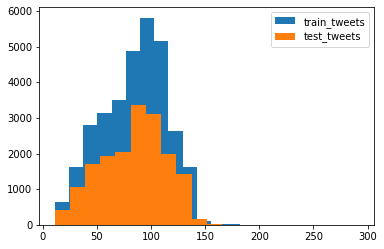

In [9]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [10]:
combi = train.append(test, ignore_index=True) 
combi.shape

(49159, 3)

In [11]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

In [12]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [14]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [16]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [17]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet

0                                                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1                                    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                                                              [bihday, your, majesti]
3                                                                                     [#model, love, take, with, time]
4                                                                                         [factsguid, societi, #motiv]
                                                             ...                                                      
49154                   [thought, factori, left, right, polaris, #trump, #uselect, #leadership, #polit, #brexit, #blm]
49155                            [feel, like, mermaid, #hairflip, #neverreadi, #formal, #wed, #gown, #dress, #mermaid]
49156    [#hillari, #campaign, today, #ohio, use

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [19]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


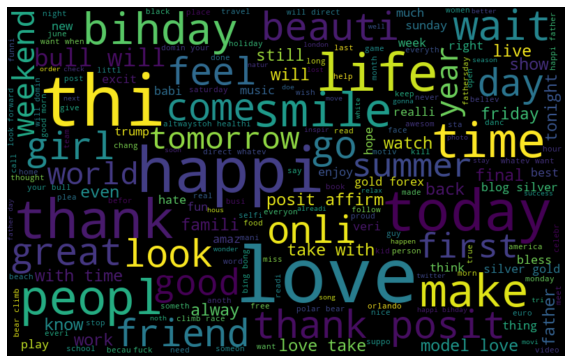

In [20]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

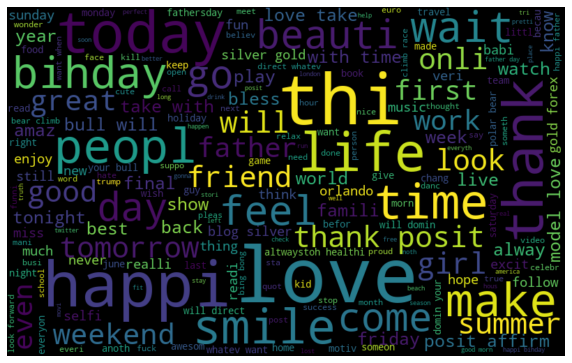

In [21]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

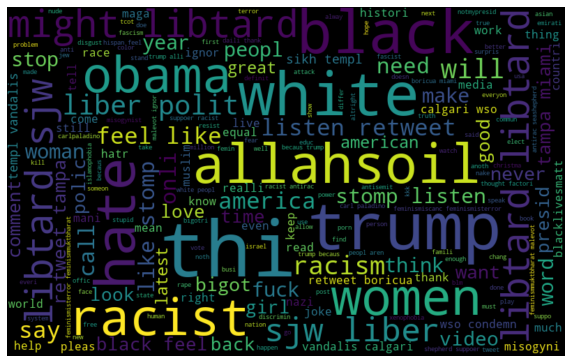

In [22]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [24]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

In [25]:
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 

In [26]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

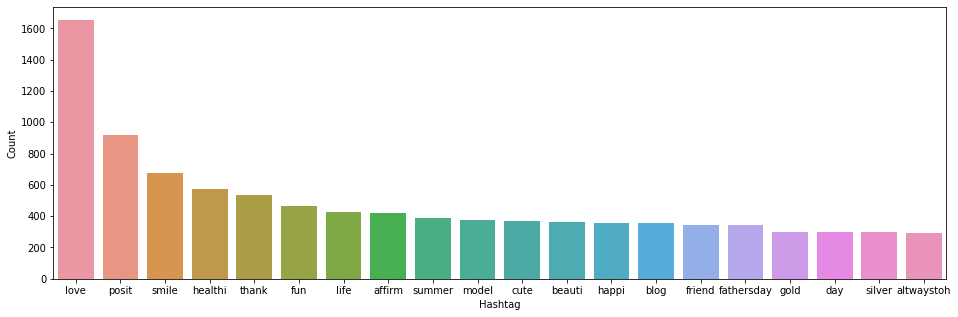

In [27]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

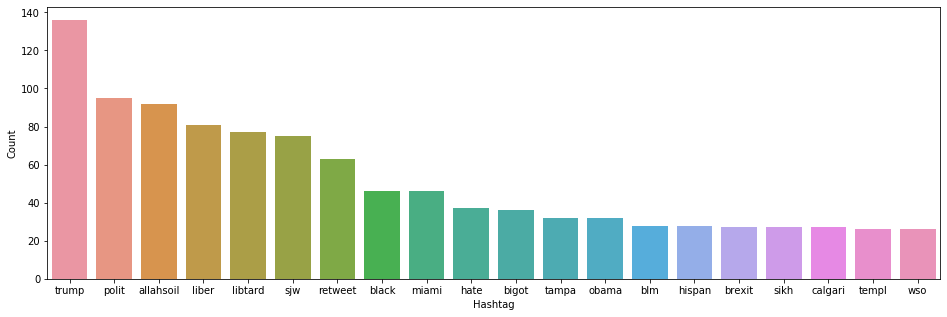

In [28]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [30]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [31]:
bow

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 191502 stored elements in Compressed Sparse Row format>

# train a Word2Vec model on our corpus

In [32]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

In [33]:
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

In [34]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510028, 7536020)

In [35]:
model_w2v.wv.most_similar(positive="dinner")

[('#avocado', 0.5652336478233337),
 ('spaghetti', 0.5528061985969543),
 ('cookout', 0.5504173040390015),
 ('melani', 0.5462346076965332),
 ('noodl', 0.5457554459571838),
 ('#biall', 0.543346643447876),
 ('#bihdaydinn', 0.5416435599327087),
 ('gown', 0.5404775738716125),
 ('spinach', 0.5402230024337769),
 ('#cellar', 0.5401667356491089)]

In [36]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5540223717689514),
 ('phoni', 0.5329532623291016),
 ('unstabl', 0.5275601148605347),
 ('hillari', 0.5260586142539978),
 ('melo', 0.524749219417572),
 ('#delegaterevolt', 0.521169900894165),
 ('unfit', 0.5178213119506836),
 ('unfavor', 0.5162276029586792),
 ('jibe', 0.5150660872459412),
 ('tomlin', 0.5089684724807739)]

In [37]:
model_w2v['food']

array([ 0.05348757, -0.71010995, -0.43033695,  0.17976324, -0.00361955,
        0.68466413,  1.0641482 , -0.05823896, -0.5183313 ,  0.30385014,
       -0.43720356,  0.92155784, -0.19361566, -0.00128911,  0.48352835,
       -0.21065298,  0.34966755, -0.29133397,  0.44259045, -0.16560298,
        0.12598836,  0.02083632,  0.24619512, -0.4061406 , -0.85889786,
       -0.19716471,  0.3977054 ,  0.57348037,  0.21873303,  0.11059207,
       -0.24021713,  0.56147975, -0.5115757 , -0.13846205, -1.1716646 ,
       -0.29304498, -0.04327081,  0.5490733 ,  0.996177  ,  0.37881163,
        0.38264707,  0.18018843, -0.5834219 , -0.03059749, -0.29298025,
        0.01601478, -1.1447636 , -0.06709807, -0.48951396,  0.27097577,
       -0.87115115, -0.07959142,  0.45051277, -0.72256666, -0.90455204,
       -0.13477956, -0.09032373,  0.77597326,  0.1269548 ,  0.45411065,
       -0.5581791 , -0.23241955,  0.98051345,  0.21796629, -0.05545715,
       -0.10547349,  0.34531328,  0.40802348, -0.57045835,  0.22

In [38]:
len(model_w2v['food']) #The length of the vector is 200

200

In [39]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
            
            
    if count != 0:
        vec /= count
    return vec

In [40]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape 

(49159, 200)

In [41]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [42]:
# Extracting train and test BoW features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],                                                            random_state=42,                                                           test_size=0.3)

In [43]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg = LogisticRegression() 
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.609340252038547

In [44]:
from sklearn import svm

In [45]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5092936802973977

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(n_estimators=400 , random_state = 11).fit(xtrain_w2v , ytrain)

In [48]:
prediction = rf.predict(xvalid_w2v)

In [49]:
f1_score(yvalid , prediction)

0.5191489361702128

In [50]:
from xgboost import XGBClassifier

In [52]:
xgb = XGBClassifier(max_depth = 6 , n_estimators=1000 , nthreat = 3).fit(xtrain_w2v , ytrain)

In [54]:
prediction = xgb.predict(xvalid_w2v)

In [55]:
f1_score(yvalid , prediction)

0.664888888888889

In [56]:
import xgboost as xgb

# Tuning of XGBoost

In [59]:
dtrain = xgb.DMatrix(xtrain_w2v , label = ytrain)
dvalid = xgb.DMatrix(xvalid_w2v , label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [70]:
# Paramters that we are going to tune
params = {
    "objective":'binary:logistic',
    "max_depth":6 , 
    "min_child_weight": 1,
    "eta":.3,
    "subsample": 1,
    "colsample_bytree": 1
}

In [73]:
def custom_eval(preds , dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3 ).astype(np.int)
    return [("f1_score" , f1_score(labels , preds))]

In [88]:
gridsearch_params = [(max_depth , min_child_weight) for max_depth in range(6,10) for min_child_weight in range(5,8)]

In [89]:
max_f1 = 0. #initializing with 0

In [90]:
best_params = None
for max_depth , min_child_weight in gridsearch_params:
    print("CV with max_depth={} , min_child_weight = {}".format(max_depth , min_child_weight))
# Update our parameters
    params["max_depth"] = max_depth
    params["min_child_weight"] = min_child_weight
    #Cross-validation
    cv_results = xgb.cv(params , dtrain , feval = custom_eval , num_boost_round = 200 , maximize =True,
                       seed = 16 , nfold = 5 , early_stopping_rounds=10
                       )
    #Finding best F1 Score 
    mean_f1 = cv_results["test-f1_score-mean"].max()
    boost_rounds = cv_results["test-f1_score-mean"].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1 , boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth , min_child_weight)
        
    print ("Best params: {} , {},F1 Score: {} ".format(best_params[0] , best_params[1] , max_f1))

CV with max_depth=6 , min_child_weight = 5
	F1 Score 0.6735412000000001 for 56 rounds
Best params: 6 , 5,F1 Score: 0.6735412000000001 
CV with max_depth=6 , min_child_weight = 6
	F1 Score 0.6658948 for 47 rounds
Best params: 6 , 5,F1 Score: 0.6735412000000001 
CV with max_depth=6 , min_child_weight = 7
	F1 Score 0.6736274000000001 for 46 rounds
Best params: 6 , 7,F1 Score: 0.6736274000000001 
CV with max_depth=7 , min_child_weight = 5
	F1 Score 0.6764984 for 46 rounds
Best params: 7 , 5,F1 Score: 0.6764984 
CV with max_depth=7 , min_child_weight = 6
	F1 Score 0.6732148 for 46 rounds
Best params: 7 , 5,F1 Score: 0.6764984 
CV with max_depth=7 , min_child_weight = 7
	F1 Score 0.6769612 for 63 rounds
Best params: 7 , 7,F1 Score: 0.6769612 
CV with max_depth=8 , min_child_weight = 5
	F1 Score 0.6808664 for 73 rounds
Best params: 8 , 5,F1 Score: 0.6808664 
CV with max_depth=8 , min_child_weight = 6
	F1 Score 0.681595 for 80 rounds
Best params: 8 , 6,F1 Score: 0.681595 
CV with max_depth=8 ,

In [93]:
params["max_depth"] = 8
params["min_child_weight"] = 6

In [102]:
gridsearch_params = [
    (subsample , colsample)
    for subsample in [i/10. for i in range (5 , 10)]
    for colsample in [i/10 for i in range(5,10)]
]

In [103]:
max_f1 = 0.
best_params = None

In [ ]:
for subsample, colsample in gridsearch_params:
    print("CV with subsample = {}, colsample={}".format(subsample , colsample))
    #update our parameters
    params["colsample"] = colsample
    params["subsample"] = subsample
    cv_results = xgb.cv(params , dtrain , feval = custom_eval , num_boost_round = 200 , maximize =True,
                       seed = 16 , nfold = 5 , early_stopping_rounds=10
                       )
    #Finding best F1 Score 
    mean_f1 = cv_results["test-f1_score-mean"].max()
    boost_rounds = cv_results["test-f1_score-mean"].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1 , boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample , colsample)
        
    print ("Best params: {} , {},F1 Score: {} ".format(best_params[0] , best_params[1] , max_f1))

In [ ]:
params["subsample"] = 0.9
params["colsample_bytree"] = .5

In [107]:
max_f1 = 0.
best_params = None
for eta in [.3 , .2 , .1 , 0.05 , 0.01 , 0.005]:
    print("CV with eta={}".format(eta))
    # Update ETA 
    params['eta'] = eta
    
    #run CV
    cv_results = xgb.cv(params , dtrain , feval = custom_eval , num_boost_round = 1000 , maximize =True,
                       seed = 16 , nfold = 5 , early_stopping_rounds=20
                       )
    #Finding best F1 Score 
    mean_f1 = cv_results["test-f1_score-mean"].max()
    boost_rounds = cv_results["test-f1_score-mean"].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1 , boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta
        
    print ("Best params: {} ,F1 Score: {} ".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.6808098 for 82 rounds
Best params: 0.3 ,F1 Score: 0.6808098 
CV with eta=0.2
	F1 Score 0.6882412 for 101 rounds
Best params: 0.2 ,F1 Score: 0.6882412 
CV with eta=0.1
	F1 Score 0.6876895999999999 for 120 rounds
Best params: 0.2 ,F1 Score: 0.6882412 
CV with eta=0.05
	F1 Score 0.6771223999999999 for 134 rounds
Best params: 0.2 ,F1 Score: 0.6882412 
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
Best params: 0.2 ,F1 Score: 0.6882412 
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.2 ,F1 Score: 0.6882412 


In [108]:
params['eta'] = 0.2

In [109]:
xgb_model = xgb.train(params , dtrain , feval = custom_eval , num_boost_round = 1000 ,
                     maximize = True , 
                     evals = [(dvalid , "Validation")] , early_stopping_rounds = 10
                     )

[14:59:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Validation-error:0.06184	Validation-f1_score:0.13317
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.05538	Validation-f1_score:0.13317
[2]	Validation-error:0.05329	Validation-f1_score:0.40705
[3]	Validation-error:0.05339	Validation-f1_score:0.49250
[4]	Validation-error:0.05152	Validation-f1_score:0.54815
[5]	Validation-error:0.05110	Validation-f1_score:0.57514
[6]	Validation-error:0.05058	Validation-f1_score:0.59065
[7]	Validation-error:0.05047	Validation-f1_score:0.

In [111]:
test_pred = xgb_model.predict(dtest)
test["label"] = (test_pred >= 0.3).astype(np.int)
submission = test[['id' , 'label']]
submission.to_csv("prediction_xgb.csv" , index = False)